## Test of Jupyter Notebook with GitHub Actions

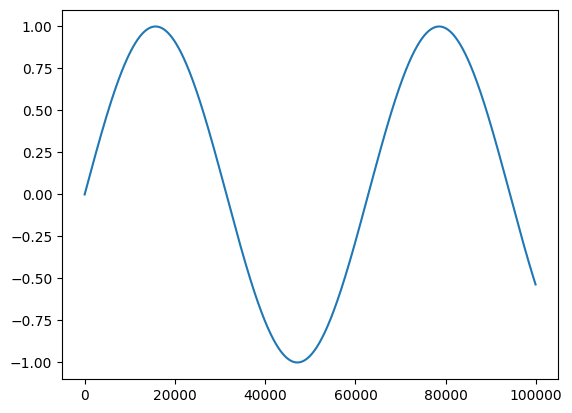

In [1]:
import matplotlib.pyplot as plt
import math

x = []
y = []

for i in range(1000):
  x.append(i * 100)
  y.append(math.sin(i * 0.01))

plt.plot(x,y)